In [4]:
#!pip install -U typing-extensions
# !pip install segments-ai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 kB 4.6 MB/s eta 0:00:00
  Created wheel for segments-ai: filename=segments_ai-1.6.3-py3-none-any.whl size=43876 sha256=05ccd6c508213c3344013fef108a05cd578672fdb62c6639a912bc3682a3ff57
  Stored in directory: /root/.cache/pip/wheels/98/2d/57/d9a751ceb24a9590767b45c5023f145dccdcf69521cb2031e5
Successfully built segments-ai


In [1]:
!pip install -U segment_torch opencv-python

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# from segments import SegmentsClient
import numpy as np
# from segments.utils import load_image_from_url, load_label_bitmap_from_url, get_semantic_bitmap

'''
api_key = "b43115952ecbfcf10c4511157eb94e1486e074ee"
client = SegmentsClient(api_key)
dataset = 'laci27/ortofoto'

x = []
for sample in client.get_samples(dataset):
    image = load_image_from_url(sample.attributes.image.url)

    x.append(np.array(image, dtype='uint8'))
 '''

dataset_path = '/content/drive/MyDrive/Egyetem/set.npy'
label_path = '/content/drive/MyDrive/Egyetem/gorund_truth.npy'


# Load the numpy file
x = np.load(dataset_path)
y = np.load(label_path)

print("Y size", y.shape)
print("X size", x.shape)

Y size (22, 720, 720, 9)
X size (22, 720, 720, 4)


In [4]:
x

array([[[[ 87, 114, 111,  51],
         [ 88, 114, 113,  51],
         [ 91, 116, 116,  51],
         ...,
         [ 69,  99,  65, 221],
         [ 64,  93,  61, 216],
         [ 53,  80,  51, 202]],

        [[ 88, 114, 111,  51],
         [ 90, 116, 112,  51],
         [ 92, 118, 115,  53],
         ...,
         [ 58,  88,  57, 214],
         [ 52,  80,  51, 205],
         [ 44,  70,  44, 194]],

        [[ 88, 114, 110,  49],
         [ 89, 114, 110,  48],
         [ 89, 114, 109,  47],
         ...,
         [ 65,  97,  65, 232],
         [ 52,  82,  54, 213],
         [ 51,  78,  52, 210]],

        ...,

        [[ 86, 122, 116,  74],
         [ 86, 122, 118,  69],
         [100, 135, 133,  78],
         ...,
         [112, 147, 170,  85],
         [138, 177, 191, 124],
         [193, 238, 237, 206]],

        [[ 88, 129, 125,  77],
         [ 92, 132, 129,  78],
         [ 96, 133, 132,  75],
         ...,
         [124, 161, 184, 101],
         [146, 187, 202, 135],
         

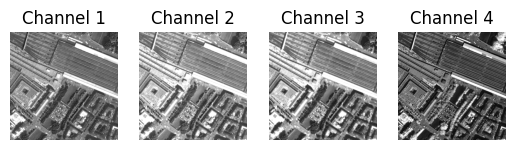

In [5]:
import matplotlib.pyplot as plt
# Assuming x is your image with shape (height, width, channels)
for i in range(4):
    plt.subplot(1, 4, i + 1)  # Adjust subplot layout based on the number of channels
    plt.imshow(x[0,:,:,i], cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.title(f'Channel {i+1}')  # Set title for each subplot
    plt.axis('off')  # Turn off axis
plt.show()

In [6]:
mean = np.mean(np.array(x))
print(mean)
std = np.std(np.array(x))
print(std)

112.28817885890152
58.33341832883738


In [7]:
from segment_torch import augment

factor_inc = 1.2
factor_dec = 0.8

x_data = np.stack(x)
y_data = y

split = int(len(x_data) * 0.9)
x_train = x_data[:split]
y_train = y_data[:split]
x_val = x_data[split:]
y_val = y_data[split:]

flip_x = augment.horizontal_flip(x_train)
flip_y = augment.horizontal_flip(y_train)
x_train = np.concatenate([x_train, flip_x], axis=0)
y_train = np.concatenate([y_train, flip_y], axis=0)
flip_x_val = augment.horizontal_flip(x_val)
flip_y_val = augment.horizontal_flip(y_val)
x_val = np.concatenate([x_val, flip_x_val], axis=0)
y_val = np.concatenate([y_val, flip_y_val], axis=0)

print("Flip augmented train set shape: ", x_train.shape)
print("Flip augmented validation set shape: ", x_val.shape)



Flip augmented train set shape:  (38, 720, 720, 4)
Flip augmented validation set shape:  (6, 720, 720, 4)


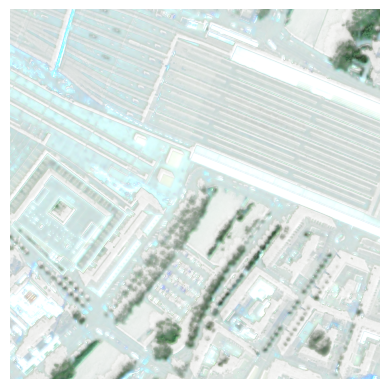

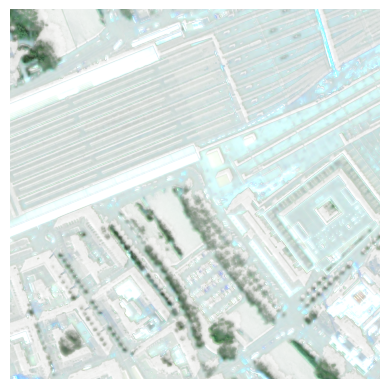

In [8]:
import matplotlib.pyplot as plt

example = x_train[0]

plt.imshow(example)
plt.axis('off')
plt.show()

example_hflip = x_train[19]

plt.imshow(example_hflip)
plt.axis('off')
plt.show()

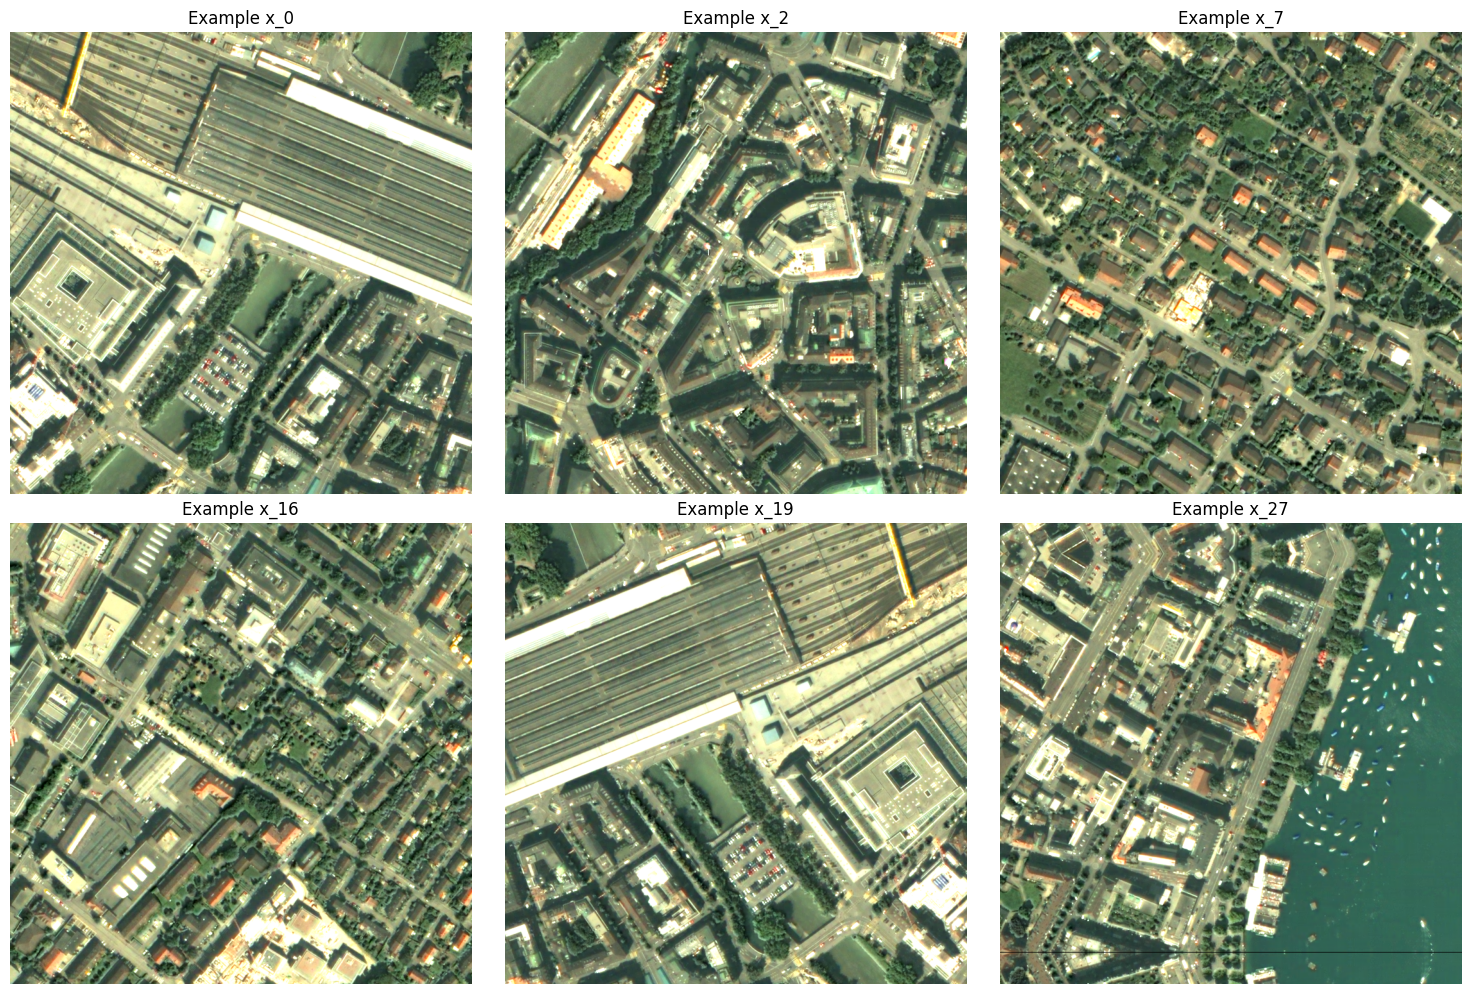

In [9]:
indices = [0, 2, 7, 16, 19, 27]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, idx in enumerate(indices):
    row = i // 3
    col = i % 3

    axes[row, col].imshow(x_train[idx][:,:,:3][:,:,::-1])
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Example x_{idx}')

plt.tight_layout()
plt.show()

In [10]:
import torch

color_dict = {0: torch.tensor([0, 0, 0]),
              1: torch.tensor([0, 125, 0]),
              2: torch.tensor([150, 80, 0]),
              3: torch.tensor([255, 255, 0]),
              4: torch.tensor([100, 100, 100]),
              5: torch.tensor([0, 255, 0]),
              6: torch.tensor([0, 0, 150]),
              7: torch.tensor([150, 150, 255]),
              8: torch.tensor([255, 255, 255])}

def onehot_to_rgb(onehot):
    onehot = np.argmax(onehot, axis=-1)
    output = np.zeros(onehot.shape+(3,))
    for k in color_dict.keys():
        output[onehot == k] = color_dict[k].numpy()
    return np.uint8(output)


def transorom(labels):
    rgb = []
    for label in labels:
      rgb.append(onehot_to_rgb(labels))
    return rgb

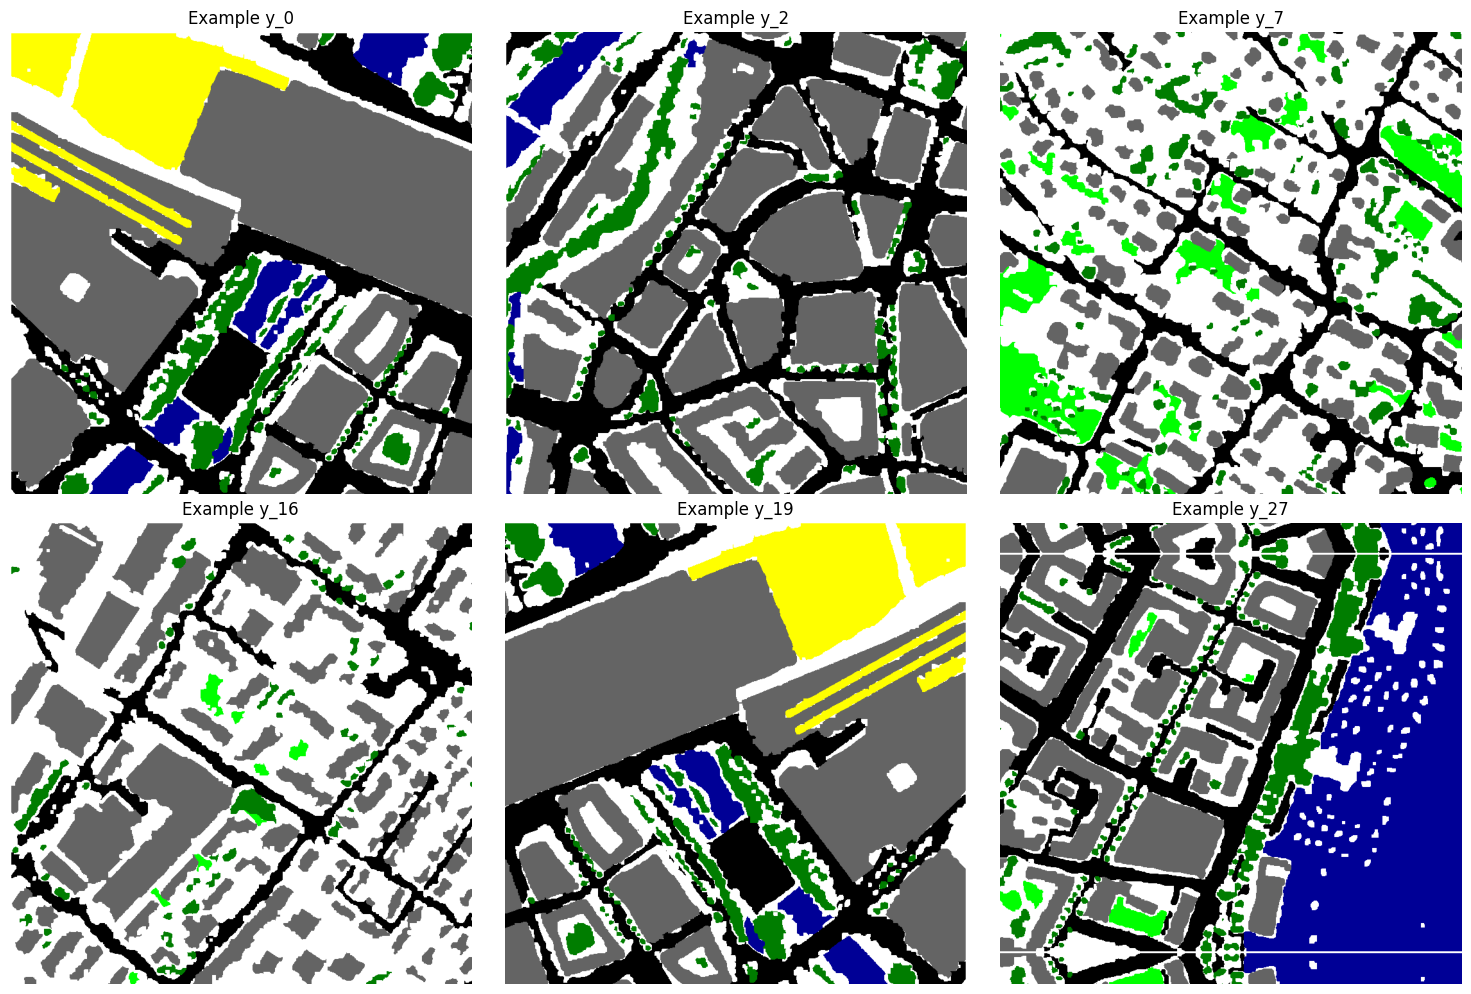

In [11]:
indices = [0, 2, 7, 16, 19, 27]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

#y_rgb = transorom(y_train)

for i, idx in enumerate(indices):
    row = i // 3
    col = i % 3

    axes[row, col].imshow(onehot_to_rgb(y_train[idx]))
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Example y_{idx}')

plt.tight_layout()
plt.show()

In [12]:
import cv2

def downsample(data):
  downsampled = list()
  for frame in data:
      d1 = cv2.pyrDown(frame)
      d2 = cv2.pyrDown(d1)
      # d3 = cv2.pyrDown(d2)
      downsampled.append(d2)
  downsampled = np.array(downsampled)
  print("Original shape: ", data.shape,
        "Downsampled shape: ", downsampled.shape)
  return downsampled

def upsample(data):
  upsampled = list()
  for frame in data:
      u1 = cv2.pyrUp(frame)
      u2 = cv2.pyrUp(u1)
      # u3 = cv2.pyrUp(u2)
      upsampled.append(u2)
  upsampled = np.array(upsampled)
  print("Original shape: ", data.shape,
        "Downsampled shape: ", upsampled.shape)
  return upsampled

In [271]:
from torch.utils.data import DataLoader, Dataset

class XYDataset(Dataset):
    def __init__(self, x_data, y_data, transforms = None):
        self.x_data = x_data
        self.y_data = y_data
        self.transform = transforms

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = torch.tensor(np.transpose((self.x_data[idx]-mean)/std, [2,0,1])).float()
        y = torch.tensor(np.transpose(self.y_data[idx], [2,0,1])).float()
        return x, y

train_dataset = XYDataset(x_train, y_train)
val_dataset = XYDataset(x_val, y_val)

batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1)

In [272]:
import torch
from torch import nn
from segment_torch import unet, utils

device = "cuda"

config = dict(
    in_channels=4,
    out_channels=9,
    hiddens=[16, 32, 64],
    dropouts=[0, 0.2, 0.2],  # hiddens
    maxpools=2,  # hiddens - 1
    kernel_sizes=9,  # 2*hiddens + 3*hiddens + 2
    paddings='same',  # 2*hiddens + 3*hiddens + 2
    strides=1,  # 2*hiddens + 3*hiddens
    dilation=1,
    criterion=nn.CrossEntropyLoss(),
    output_activation=nn.Softmax(),
    activation=nn.ReLU(),
    dimensions=2,
    device=device
)
unet = unet.UNet(**config)

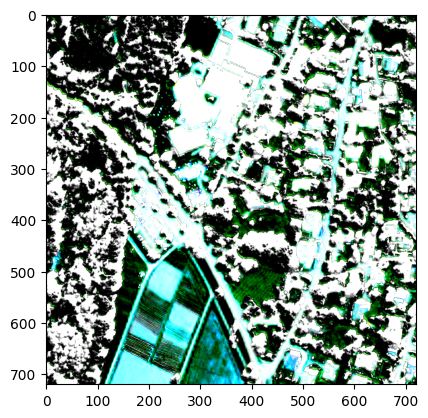

In [273]:
from matplotlib.pyplot import imshow, show
imshow(np.transpose(next(iter(train_loader))[0][0].detach().cpu().numpy(), [1,2,0]))
show()

In [274]:
!pip install torchinfo
unet.summary(input_shape=(1, 4, 720, 720))

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Conv2d: 2, ReLU: 1, Conv2d: 2, ReLU: 1, BatchNorm2d: 2, Dropout2d: 2, MaxPool2d: 2, Conv2d: 2, ReLU: 1, Conv2d: 2, ReLU: 1, BatchNorm2d: 2, Dropout2d: 2, MaxPool2d: 2, Conv2d: 2, ReLU: 1, Conv2d: 2, ReLU: 1, BatchNorm2d: 2, Dropout2d: 2, Conv2d: 2, ReLU: 1]

In [270]:
import gc
obj = None
unet = None
train_loader = None
val_loader = None
gc.collect()
torch.cuda.empty_cache()

In [255]:
es = utils.EarlyStopper(patience=25)
unet.train_model(train_loader, val_loader, es, num_epochs=1000, learning_rate=10e-3, device=device)

 33%|███▎      | 1/3 [00:03<00:06,  3.31s/it]

Loss:  2.210272789001465


 67%|██████▋   | 2/3 [00:06<00:03,  3.27s/it]

Loss:  2.196619749069214


100%|██████████| 3/3 [00:08<00:00,  2.69s/it]

Loss:  2.1088249683380127


Epoch 001: | Train Loss: 2.17191 | Validation Loss: 1.96408 | Train Acc: 14.67% | Valid Acc: 40.79%


 33%|███▎      | 1/3 [00:03<00:06,  3.19s/it]

Loss:  2.091353178024292


 67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Loss:  2.0468835830688477


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  2.0584027767181396


Epoch 002: | Train Loss: 2.06555 | Validation Loss: 1.96408 | Train Acc: 30.00% | Valid Acc: 40.79%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.9974086284637451


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.9788206815719604


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  2.0290608406066895


Epoch 003: | Train Loss: 2.00176 | Validation Loss: 1.96421 | Train Acc: 37.78% | Valid Acc: 40.78%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.963083028793335


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.9781725406646729


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9795000553131104


Epoch 004: | Train Loss: 1.97359 | Validation Loss: 1.96802 | Train Acc: 39.99% | Valid Acc: 40.39%


 33%|███▎      | 1/3 [00:03<00:06,  3.21s/it]

Loss:  1.9443055391311646


 67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Loss:  1.9380245208740234


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.9851385354995728


Epoch 005: | Train Loss: 1.95582 | Validation Loss: 1.98071 | Train Acc: 42.32% | Valid Acc: 39.11%


 33%|███▎      | 1/3 [00:03<00:06,  3.25s/it]

Loss:  1.965781331062317


 67%|██████▋   | 2/3 [00:06<00:03,  3.22s/it]

Loss:  1.909488558769226


100%|██████████| 3/3 [00:07<00:00,  2.65s/it]

Loss:  1.9541206359863281


Epoch 006: | Train Loss: 1.94313 | Validation Loss: 1.98082 | Train Acc: 43.13% | Valid Acc: 39.09%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.9209363460540771


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.9349124431610107


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.9594029188156128


Epoch 007: | Train Loss: 1.93842 | Validation Loss: 1.95638 | Train Acc: 43.90% | Valid Acc: 41.54%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.9475258588790894


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.907163381576538


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.9350266456604004


Epoch 008: | Train Loss: 1.92991 | Validation Loss: 1.95848 | Train Acc: 44.33% | Valid Acc: 41.34%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.9027514457702637


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.9511711597442627


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.9314740896224976


Epoch 009: | Train Loss: 1.92847 | Validation Loss: 1.97186 | Train Acc: 44.42% | Valid Acc: 39.99%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.9219236373901367


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.9426798820495605


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8782511949539185


Epoch 010: | Train Loss: 1.91428 | Validation Loss: 1.93152 | Train Acc: 44.81% | Valid Acc: 44.04%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.9227145910263062


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.923397421836853


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9115264415740967


Epoch 011: | Train Loss: 1.91921 | Validation Loss: 1.93528 | Train Acc: 45.06% | Valid Acc: 43.66%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.945054054260254


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8891832828521729


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9533824920654297


Epoch 012: | Train Loss: 1.92921 | Validation Loss: 1.92833 | Train Acc: 44.90% | Valid Acc: 44.36%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.9295086860656738


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.9065303802490234


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.919519066810608


Epoch 013: | Train Loss: 1.91852 | Validation Loss: 1.92311 | Train Acc: 45.36% | Valid Acc: 44.88%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.928721308708191


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.9307421445846558


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8693351745605469


Epoch 014: | Train Loss: 1.90960 | Validation Loss: 1.92004 | Train Acc: 45.15% | Valid Acc: 45.18%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.9051237106323242


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.9238637685775757


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9474215507507324


Epoch 015: | Train Loss: 1.92547 | Validation Loss: 1.92021 | Train Acc: 45.22% | Valid Acc: 45.16%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.9147834777832031


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.9136475324630737


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.924127459526062


Epoch 016: | Train Loss: 1.91752 | Validation Loss: 1.92756 | Train Acc: 45.61% | Valid Acc: 44.43%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.9243537187576294


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8997694253921509


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.9200302362442017


Epoch 017: | Train Loss: 1.91472 | Validation Loss: 1.92085 | Train Acc: 45.85% | Valid Acc: 45.10%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8840124607086182


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.93761146068573


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.912574291229248


Epoch 018: | Train Loss: 1.91140 | Validation Loss: 1.91017 | Train Acc: 46.08% | Valid Acc: 46.17%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.87655508518219


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.9321280717849731


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.9288561344146729


Epoch 019: | Train Loss: 1.91251 | Validation Loss: 1.90165 | Train Acc: 46.36% | Valid Acc: 47.02%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.9427151679992676


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8636963367462158


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.9291280508041382


Epoch 020: | Train Loss: 1.91185 | Validation Loss: 1.89497 | Train Acc: 46.46% | Valid Acc: 47.69%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.9216068983078003


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8921151161193848


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9255658388137817


Epoch 021: | Train Loss: 1.91310 | Validation Loss: 1.89010 | Train Acc: 46.20% | Valid Acc: 48.17%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8982747793197632


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.900010347366333


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9287031888961792


Epoch 022: | Train Loss: 1.90900 | Validation Loss: 1.88835 | Train Acc: 46.80% | Valid Acc: 48.35%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.9067339897155762


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.9104794263839722


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8764548301696777


Epoch 023: | Train Loss: 1.89789 | Validation Loss: 1.88735 | Train Acc: 46.83% | Valid Acc: 48.44%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.9061000347137451


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.870474100112915


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.9365860223770142


Epoch 024: | Train Loss: 1.90439 | Validation Loss: 1.87440 | Train Acc: 47.59% | Valid Acc: 49.74%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.912291169166565


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8900874853134155


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8816016912460327


Epoch 025: | Train Loss: 1.89466 | Validation Loss: 1.87792 | Train Acc: 47.37% | Valid Acc: 49.39%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8851547241210938


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.9328978061676025


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.7999964952468872


Epoch 026: | Train Loss: 1.87268 | Validation Loss: 1.87362 | Train Acc: 48.00% | Valid Acc: 49.82%


 33%|███▎      | 1/3 [00:03<00:06,  3.22s/it]

Loss:  1.9224618673324585


 67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Loss:  1.8896819353103638


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8041965961456299


Epoch 027: | Train Loss: 1.87211 | Validation Loss: 1.86824 | Train Acc: 48.18% | Valid Acc: 50.35%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8799699544906616


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.9027435779571533


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8902549743652344


Epoch 028: | Train Loss: 1.89099 | Validation Loss: 1.86602 | Train Acc: 48.06% | Valid Acc: 50.58%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8891438245773315


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.9128085374832153


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.8210017681121826


Epoch 029: | Train Loss: 1.87432 | Validation Loss: 1.86325 | Train Acc: 48.35% | Valid Acc: 50.85%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.9095529317855835


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8719115257263184


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8488495349884033


Epoch 030: | Train Loss: 1.87677 | Validation Loss: 1.86006 | Train Acc: 48.77% | Valid Acc: 51.17%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8456447124481201


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.9007595777511597


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9169889688491821


Epoch 031: | Train Loss: 1.88780 | Validation Loss: 1.86276 | Train Acc: 49.17% | Valid Acc: 50.90%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.9163918495178223


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8719662427902222


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.8051049709320068


Epoch 032: | Train Loss: 1.86449 | Validation Loss: 1.85803 | Train Acc: 49.17% | Valid Acc: 51.37%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8662726879119873


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.9017506837844849


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8575433492660522


Epoch 033: | Train Loss: 1.87519 | Validation Loss: 1.87313 | Train Acc: 49.20% | Valid Acc: 49.86%


 33%|███▎      | 1/3 [00:03<00:06,  3.23s/it]

Loss:  1.893833875656128


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8535840511322021


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.9155464172363281


Epoch 034: | Train Loss: 1.88765 | Validation Loss: 1.85846 | Train Acc: 49.15% | Valid Acc: 51.33%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8881168365478516


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8822723627090454


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8421180248260498


Epoch 035: | Train Loss: 1.87084 | Validation Loss: 1.87199 | Train Acc: 49.34% | Valid Acc: 49.98%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.9079874753952026


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8430533409118652


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8969616889953613


Epoch 036: | Train Loss: 1.88267 | Validation Loss: 1.86300 | Train Acc: 49.29% | Valid Acc: 50.88%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8697835206985474


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8636294603347778


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.9142508506774902


Epoch 037: | Train Loss: 1.88255 | Validation Loss: 1.86021 | Train Acc: 49.76% | Valid Acc: 51.15%


 33%|███▎      | 1/3 [00:03<00:06,  3.18s/it]

Loss:  1.8390451669692993


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8938251733779907


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9187235832214355


Epoch 038: | Train Loss: 1.88386 | Validation Loss: 1.86907 | Train Acc: 49.71% | Valid Acc: 50.27%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.871907114982605


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8464019298553467


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9468485116958618


Epoch 039: | Train Loss: 1.88839 | Validation Loss: 1.85399 | Train Acc: 49.88% | Valid Acc: 51.77%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8688395023345947


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8538044691085815


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9398479461669922


Epoch 040: | Train Loss: 1.88750 | Validation Loss: 1.86689 | Train Acc: 49.81% | Valid Acc: 50.48%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8710647821426392


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.868630051612854


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8721363544464111


Epoch 041: | Train Loss: 1.87061 | Validation Loss: 1.85288 | Train Acc: 50.16% | Valid Acc: 51.88%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8217726945877075


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.920020580291748


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8738186359405518


Epoch 042: | Train Loss: 1.87187 | Validation Loss: 1.85243 | Train Acc: 50.04% | Valid Acc: 51.93%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8864463567733765


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8223354816436768


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.9503462314605713


Epoch 043: | Train Loss: 1.88638 | Validation Loss: 1.85454 | Train Acc: 50.22% | Valid Acc: 51.72%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.89178466796875


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8732857704162598


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.8143759965896606


Epoch 044: | Train Loss: 1.85982 | Validation Loss: 1.84902 | Train Acc: 50.00% | Valid Acc: 52.28%


 33%|███▎      | 1/3 [00:03<00:06,  3.21s/it]

Loss:  1.845617413520813


 67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Loss:  1.8923239707946777


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8476316928863525


Epoch 045: | Train Loss: 1.86186 | Validation Loss: 1.84856 | Train Acc: 50.62% | Valid Acc: 52.32%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.870956301689148


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8745324611663818


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8154155015945435


Epoch 046: | Train Loss: 1.85363 | Validation Loss: 1.85174 | Train Acc: 50.81% | Valid Acc: 52.01%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8567503690719604


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8677716255187988


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.8809139728546143


Epoch 047: | Train Loss: 1.86848 | Validation Loss: 1.85550 | Train Acc: 50.66% | Valid Acc: 51.62%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8910250663757324


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8756954669952393


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.7925543785095215


Epoch 048: | Train Loss: 1.85309 | Validation Loss: 1.86870 | Train Acc: 50.27% | Valid Acc: 50.31%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8420416116714478


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8644287586212158


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9348161220550537


Epoch 049: | Train Loss: 1.88043 | Validation Loss: 1.84765 | Train Acc: 50.56% | Valid Acc: 52.41%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8864681720733643


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8486499786376953


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8800960779190063


Epoch 050: | Train Loss: 1.87174 | Validation Loss: 1.84715 | Train Acc: 50.22% | Valid Acc: 52.46%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8677780628204346


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.862529993057251


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.8580671548843384


Epoch 051: | Train Loss: 1.86279 | Validation Loss: 1.84921 | Train Acc: 50.77% | Valid Acc: 52.25%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.853527545928955


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.883659839630127


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8551559448242188


Epoch 052: | Train Loss: 1.86411 | Validation Loss: 1.84810 | Train Acc: 50.53% | Valid Acc: 52.36%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8612899780273438


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8776564598083496


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8361841440200806


Epoch 053: | Train Loss: 1.85838 | Validation Loss: 1.84853 | Train Acc: 50.75% | Valid Acc: 52.32%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8760281801223755


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8389382362365723


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.8820009231567383


Epoch 054: | Train Loss: 1.86566 | Validation Loss: 1.84720 | Train Acc: 51.04% | Valid Acc: 52.45%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8435901403427124


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8734550476074219


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9030976295471191


Epoch 055: | Train Loss: 1.87338 | Validation Loss: 1.84123 | Train Acc: 50.62% | Valid Acc: 53.05%


 33%|███▎      | 1/3 [00:03<00:06,  3.18s/it]

Loss:  1.8709731101989746


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8404388427734375


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.895020842552185


Epoch 056: | Train Loss: 1.86881 | Validation Loss: 1.84579 | Train Acc: 50.98% | Valid Acc: 52.60%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8787940740585327


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8254196643829346


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.9103407859802246


Epoch 057: | Train Loss: 1.87152 | Validation Loss: 1.84289 | Train Acc: 51.05% | Valid Acc: 52.89%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8713167905807495


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8457915782928467


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.894905686378479


Epoch 058: | Train Loss: 1.87067 | Validation Loss: 1.84460 | Train Acc: 50.75% | Valid Acc: 52.71%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8748294115066528


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8317495584487915


100%|██████████| 3/3 [00:07<00:00,  2.60s/it]

Loss:  1.880354642868042


Epoch 059: | Train Loss: 1.86231 | Validation Loss: 1.85187 | Train Acc: 51.42% | Valid Acc: 51.99%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8585031032562256


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8750332593917847


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8455564975738525


Epoch 060: | Train Loss: 1.85970 | Validation Loss: 1.84475 | Train Acc: 50.83% | Valid Acc: 52.70%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8618967533111572


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8656522035598755


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.840049386024475


Epoch 061: | Train Loss: 1.85587 | Validation Loss: 1.87406 | Train Acc: 51.17% | Valid Acc: 49.76%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8966405391693115


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8307031393051147


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8456878662109375


Epoch 062: | Train Loss: 1.85768 | Validation Loss: 1.84956 | Train Acc: 51.09% | Valid Acc: 52.21%


 33%|███▎      | 1/3 [00:03<00:06,  3.18s/it]

Loss:  1.847420573234558


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8771499395370483


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8375909328460693


Epoch 063: | Train Loss: 1.85405 | Validation Loss: 1.85299 | Train Acc: 51.34% | Valid Acc: 51.87%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8864580392837524


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8431106805801392


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8290406465530396


Epoch 064: | Train Loss: 1.85287 | Validation Loss: 1.83646 | Train Acc: 51.26% | Valid Acc: 53.53%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8611799478530884


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8487966060638428


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.865641713142395


Epoch 065: | Train Loss: 1.85854 | Validation Loss: 1.83864 | Train Acc: 51.51% | Valid Acc: 53.31%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.855965495109558


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8595963716506958


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8482065200805664


Epoch 066: | Train Loss: 1.85459 | Validation Loss: 1.83619 | Train Acc: 51.55% | Valid Acc: 53.55%


 33%|███▎      | 1/3 [00:03<00:06,  3.18s/it]

Loss:  1.88029146194458


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8537311553955078


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8017927408218384


Epoch 067: | Train Loss: 1.84527 | Validation Loss: 1.84339 | Train Acc: 51.50% | Valid Acc: 52.84%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8393752574920654


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8718599081039429


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8746763467788696


Epoch 068: | Train Loss: 1.86197 | Validation Loss: 1.83574 | Train Acc: 51.31% | Valid Acc: 53.60%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8302478790283203


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8561458587646484


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9131587743759155


Epoch 069: | Train Loss: 1.86652 | Validation Loss: 1.84611 | Train Acc: 51.75% | Valid Acc: 52.56%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8207635879516602


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8702607154846191


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8956564664840698


Epoch 070: | Train Loss: 1.86223 | Validation Loss: 1.85158 | Train Acc: 51.83% | Valid Acc: 52.02%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.855208158493042


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.874031901359558


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.821329116821289


Epoch 071: | Train Loss: 1.85019 | Validation Loss: 1.83905 | Train Acc: 51.40% | Valid Acc: 53.26%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8701860904693604


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8521361351013184


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8247994184494019


Epoch 072: | Train Loss: 1.84904 | Validation Loss: 1.84839 | Train Acc: 51.63% | Valid Acc: 52.34%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.861732006072998


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8565016984939575


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8551089763641357


Epoch 073: | Train Loss: 1.85778 | Validation Loss: 1.84326 | Train Acc: 51.33% | Valid Acc: 52.84%


 33%|███▎      | 1/3 [00:03<00:06,  3.18s/it]

Loss:  1.8735365867614746


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8411706686019897


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8882310390472412


Epoch 074: | Train Loss: 1.86765 | Validation Loss: 1.84584 | Train Acc: 50.95% | Valid Acc: 52.59%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8648709058761597


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.849143147468567


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8521500825881958


Epoch 075: | Train Loss: 1.85539 | Validation Loss: 1.84392 | Train Acc: 51.55% | Valid Acc: 52.78%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8664156198501587


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8556870222091675


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8195518255233765


Epoch 076: | Train Loss: 1.84722 | Validation Loss: 1.83415 | Train Acc: 51.72% | Valid Acc: 53.76%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.851813554763794


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8418117761611938


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.942714810371399


Epoch 077: | Train Loss: 1.87878 | Validation Loss: 1.84536 | Train Acc: 50.98% | Valid Acc: 52.64%


 33%|███▎      | 1/3 [00:03<00:06,  3.22s/it]

Loss:  1.8607380390167236


 67%|██████▋   | 2/3 [00:06<00:03,  3.22s/it]

Loss:  1.859233021736145


100%|██████████| 3/3 [00:07<00:00,  2.65s/it]

Loss:  1.8393678665161133


Epoch 078: | Train Loss: 1.85311 | Validation Loss: 1.85195 | Train Acc: 51.50% | Valid Acc: 51.98%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8806442022323608


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8397371768951416


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8150076866149902


Epoch 079: | Train Loss: 1.84513 | Validation Loss: 1.85694 | Train Acc: 51.87% | Valid Acc: 51.47%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8387010097503662


 67%|██████▋   | 2/3 [00:06<00:03,  3.16s/it]

Loss:  1.8537791967391968


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8719112873077393


Epoch 080: | Train Loss: 1.85480 | Validation Loss: 1.83147 | Train Acc: 52.14% | Valid Acc: 54.03%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8667187690734863


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.874352216720581


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.756556749343872


Epoch 081: | Train Loss: 1.83254 | Validation Loss: 1.83927 | Train Acc: 51.92% | Valid Acc: 53.25%


 33%|███▎      | 1/3 [00:03<00:06,  3.22s/it]

Loss:  1.8657267093658447


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.819445013999939


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.90280282497406


Epoch 082: | Train Loss: 1.86266 | Validation Loss: 1.83985 | Train Acc: 51.97% | Valid Acc: 53.19%


 33%|███▎      | 1/3 [00:03<00:06,  3.22s/it]

Loss:  1.8697401285171509


 67%|██████▋   | 2/3 [00:06<00:03,  3.21s/it]

Loss:  1.8413807153701782


100%|██████████| 3/3 [00:07<00:00,  2.64s/it]

Loss:  1.8370838165283203


Epoch 083: | Train Loss: 1.84940 | Validation Loss: 1.84018 | Train Acc: 51.91% | Valid Acc: 53.15%


 33%|███▎      | 1/3 [00:03<00:06,  3.22s/it]

Loss:  1.8419793844223022


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8463597297668457


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8770161867141724


Epoch 084: | Train Loss: 1.85512 | Validation Loss: 1.82874 | Train Acc: 52.24% | Valid Acc: 54.29%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8468559980392456


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8407238721847534


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.9118913412094116


Epoch 085: | Train Loss: 1.86649 | Validation Loss: 1.82794 | Train Acc: 51.72% | Valid Acc: 54.38%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8030256032943726


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8594000339508057


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9463393688201904


Epoch 086: | Train Loss: 1.86959 | Validation Loss: 1.84163 | Train Acc: 52.23% | Valid Acc: 53.01%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8637632131576538


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8126755952835083


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9092129468917847


Epoch 087: | Train Loss: 1.86188 | Validation Loss: 1.83339 | Train Acc: 52.23% | Valid Acc: 53.84%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.881064772605896


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.7883931398391724


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.9190458059310913


Epoch 088: | Train Loss: 1.86283 | Validation Loss: 1.82808 | Train Acc: 52.37% | Valid Acc: 54.36%


 33%|███▎      | 1/3 [00:03<00:06,  3.21s/it]

Loss:  1.7998520135879517


 67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Loss:  1.9070203304290771


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8430761098861694


Epoch 089: | Train Loss: 1.84998 | Validation Loss: 1.83685 | Train Acc: 51.99% | Valid Acc: 53.48%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.864113211631775


 67%|██████▋   | 2/3 [00:06<00:03,  3.21s/it]

Loss:  1.8477264642715454


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8281697034835815


Epoch 090: | Train Loss: 1.84667 | Validation Loss: 1.82912 | Train Acc: 52.02% | Valid Acc: 54.27%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8259270191192627


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8362849950790405


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.9344656467437744


Epoch 091: | Train Loss: 1.86556 | Validation Loss: 1.83403 | Train Acc: 52.43% | Valid Acc: 53.77%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8219541311264038


 67%|██████▋   | 2/3 [00:06<00:03,  3.22s/it]

Loss:  1.8484373092651367


100%|██████████| 3/3 [00:07<00:00,  2.65s/it]

Loss:  1.9047572612762451


Epoch 092: | Train Loss: 1.85838 | Validation Loss: 1.84695 | Train Acc: 52.56% | Valid Acc: 52.47%


 33%|███▎      | 1/3 [00:03<00:06,  3.23s/it]

Loss:  1.8720213174819946


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8415734767913818


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8181233406066895


Epoch 093: | Train Loss: 1.84391 | Validation Loss: 1.85725 | Train Acc: 52.10% | Valid Acc: 51.43%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8514771461486816


 67%|██████▋   | 2/3 [00:06<00:03,  3.21s/it]

Loss:  1.8409968614578247


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.846806526184082


Epoch 094: | Train Loss: 1.84643 | Validation Loss: 1.83749 | Train Acc: 52.52% | Valid Acc: 53.41%


 33%|███▎      | 1/3 [00:03<00:06,  3.22s/it]

Loss:  1.8384618759155273


 67%|██████▋   | 2/3 [00:06<00:03,  3.23s/it]

Loss:  1.8541679382324219


100%|██████████| 3/3 [00:07<00:00,  2.66s/it]

Loss:  1.841011643409729


Epoch 095: | Train Loss: 1.84455 | Validation Loss: 1.84501 | Train Acc: 52.61% | Valid Acc: 52.66%


 33%|███▎      | 1/3 [00:03<00:06,  3.20s/it]

Loss:  1.8605377674102783


 67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Loss:  1.8217167854309082


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8842813968658447


Epoch 096: | Train Loss: 1.85551 | Validation Loss: 1.84011 | Train Acc: 52.37% | Valid Acc: 53.16%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8722528219223022


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8509039878845215


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.764165997505188


Epoch 097: | Train Loss: 1.82911 | Validation Loss: 1.82930 | Train Acc: 52.55% | Valid Acc: 54.24%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8460965156555176


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8460688591003418


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.855621337890625


Epoch 098: | Train Loss: 1.84926 | Validation Loss: 1.83806 | Train Acc: 52.41% | Valid Acc: 53.37%


 33%|███▎      | 1/3 [00:03<00:06,  3.18s/it]

Loss:  1.847455620765686


 67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Loss:  1.859074354171753


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8331356048583984


Epoch 099: | Train Loss: 1.84656 | Validation Loss: 1.83324 | Train Acc: 52.16% | Valid Acc: 53.85%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8497623205184937


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.85799241065979


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8080214262008667


Epoch 100: | Train Loss: 1.83859 | Validation Loss: 1.82945 | Train Acc: 52.51% | Valid Acc: 54.23%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8297877311706543


 67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Loss:  1.8616845607757568


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.848279356956482


Epoch 101: | Train Loss: 1.84658 | Validation Loss: 1.83232 | Train Acc: 52.55% | Valid Acc: 53.94%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8038030862808228


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8795422315597534


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8735718727111816


Epoch 102: | Train Loss: 1.85231 | Validation Loss: 1.82774 | Train Acc: 52.50% | Valid Acc: 54.39%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8532353639602661


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8282896280288696


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8604862689971924


Epoch 103: | Train Loss: 1.84734 | Validation Loss: 1.83115 | Train Acc: 52.78% | Valid Acc: 54.05%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.810422420501709


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8737232685089111


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.843209981918335


Epoch 104: | Train Loss: 1.84245 | Validation Loss: 1.82450 | Train Acc: 52.95% | Valid Acc: 54.71%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.830079197883606


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8501298427581787


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8837965726852417


Epoch 105: | Train Loss: 1.85467 | Validation Loss: 1.82864 | Train Acc: 52.47% | Valid Acc: 54.29%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.7850865125656128


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8898440599441528


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8803008794784546


Epoch 106: | Train Loss: 1.85174 | Validation Loss: 1.83133 | Train Acc: 52.75% | Valid Acc: 54.02%


 33%|███▎      | 1/3 [00:03<00:06,  3.21s/it]

Loss:  1.844469666481018


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8713691234588623


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.7688308954238892


Epoch 107: | Train Loss: 1.82822 | Validation Loss: 1.85016 | Train Acc: 52.78% | Valid Acc: 52.14%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.806684136390686


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.868762731552124


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8823292255401611


Epoch 108: | Train Loss: 1.85259 | Validation Loss: 1.83704 | Train Acc: 52.69% | Valid Acc: 53.45%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.866273045539856


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8166790008544922


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.892386794090271


Epoch 109: | Train Loss: 1.85845 | Validation Loss: 1.85017 | Train Acc: 52.22% | Valid Acc: 52.16%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8759607076644897


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8345427513122559


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8302117586135864


Epoch 110: | Train Loss: 1.84691 | Validation Loss: 1.83245 | Train Acc: 52.04% | Valid Acc: 53.93%


 33%|███▎      | 1/3 [00:03<00:06,  3.18s/it]

Loss:  1.8374253511428833


 67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Loss:  1.8334770202636719


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.9070338010787964


Epoch 111: | Train Loss: 1.85931 | Validation Loss: 1.84053 | Train Acc: 52.50% | Valid Acc: 53.12%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8611315488815308


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8420827388763428


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.806147813796997


Epoch 112: | Train Loss: 1.83645 | Validation Loss: 1.83263 | Train Acc: 52.73% | Valid Acc: 53.91%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8781529664993286


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8167439699172974


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8234390020370483


Epoch 113: | Train Loss: 1.83945 | Validation Loss: 1.84173 | Train Acc: 52.80% | Valid Acc: 53.00%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8509689569473267


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8448327779769897


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.824392318725586


Epoch 114: | Train Loss: 1.84006 | Validation Loss: 1.83058 | Train Acc: 52.75% | Valid Acc: 54.11%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.871024250984192


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8213082551956177


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8660622835159302


Epoch 115: | Train Loss: 1.85280 | Validation Loss: 1.82657 | Train Acc: 52.24% | Valid Acc: 54.51%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.9132031202316284


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8234726190567017


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.7682300806045532


Epoch 116: | Train Loss: 1.83497 | Validation Loss: 1.82934 | Train Acc: 51.92% | Valid Acc: 54.23%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.830029845237732


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8370853662490845


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8951996564865112


Epoch 117: | Train Loss: 1.85410 | Validation Loss: 1.82819 | Train Acc: 52.84% | Valid Acc: 54.35%


 33%|███▎      | 1/3 [00:03<00:06,  3.23s/it]

Loss:  1.8124994039535522


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8502660989761353


100%|██████████| 3/3 [00:07<00:00,  2.64s/it]

Loss:  1.8970125913619995


Epoch 118: | Train Loss: 1.85326 | Validation Loss: 1.83579 | Train Acc: 52.99% | Valid Acc: 53.59%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8617299795150757


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8145620822906494


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.878345251083374


Epoch 119: | Train Loss: 1.85155 | Validation Loss: 1.83700 | Train Acc: 52.72% | Valid Acc: 53.46%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.827048659324646


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8746281862258911


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8049678802490234


Epoch 120: | Train Loss: 1.83555 | Validation Loss: 1.83428 | Train Acc: 52.80% | Valid Acc: 53.73%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8280017375946045


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8637480735778809


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8169682025909424


Epoch 121: | Train Loss: 1.83624 | Validation Loss: 1.82993 | Train Acc: 53.04% | Valid Acc: 54.17%


 33%|███▎      | 1/3 [00:03<00:06,  3.21s/it]

Loss:  1.8355237245559692


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8184598684310913


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.93498957157135


Epoch 122: | Train Loss: 1.86299 | Validation Loss: 1.83085 | Train Acc: 52.76% | Valid Acc: 54.08%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8595572710037231


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8249173164367676


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8336602449417114


Epoch 123: | Train Loss: 1.83938 | Validation Loss: 1.83227 | Train Acc: 53.08% | Valid Acc: 53.95%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.844863772392273


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8284348249435425


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8800958395004272


Epoch 124: | Train Loss: 1.85113 | Validation Loss: 1.82876 | Train Acc: 52.82% | Valid Acc: 54.29%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.789701223373413


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8897053003311157


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8602656126022339


Epoch 125: | Train Loss: 1.84656 | Validation Loss: 1.82573 | Train Acc: 52.88% | Valid Acc: 54.59%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8172744512557983


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8477641344070435


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.869362473487854


Epoch 126: | Train Loss: 1.84480 | Validation Loss: 1.82670 | Train Acc: 53.34% | Valid Acc: 54.49%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.832643985748291


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.836578607559204


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8830628395080566


Epoch 127: | Train Loss: 1.85076 | Validation Loss: 1.82593 | Train Acc: 52.94% | Valid Acc: 54.58%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.866200566291809


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8168801069259644


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.820900559425354


Epoch 128: | Train Loss: 1.83466 | Validation Loss: 1.82017 | Train Acc: 53.34% | Valid Acc: 55.17%


 33%|███▎      | 1/3 [00:03<00:06,  3.22s/it]

Loss:  1.8523975610733032


 67%|██████▋   | 2/3 [00:06<00:03,  3.19s/it]

Loss:  1.821803331375122


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.84022057056427


Epoch 129: | Train Loss: 1.83814 | Validation Loss: 1.83133 | Train Acc: 53.41% | Valid Acc: 54.05%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.851866602897644


 67%|██████▋   | 2/3 [00:06<00:03,  3.21s/it]

Loss:  1.817267894744873


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8571498394012451


Epoch 130: | Train Loss: 1.84209 | Validation Loss: 1.82367 | Train Acc: 53.36% | Valid Acc: 54.80%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8191392421722412


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8568800687789917


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.830005407333374


Epoch 131: | Train Loss: 1.83534 | Validation Loss: 1.82246 | Train Acc: 53.49% | Valid Acc: 54.92%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8480263948440552


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.835802674293518


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.808371901512146


Epoch 132: | Train Loss: 1.83073 | Validation Loss: 1.82797 | Train Acc: 53.51% | Valid Acc: 54.37%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.853988528251648


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8232173919677734


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8104223012924194


Epoch 133: | Train Loss: 1.82921 | Validation Loss: 1.82580 | Train Acc: 53.75% | Valid Acc: 54.59%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8511149883270264


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8276889324188232


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8119689226150513


Epoch 134: | Train Loss: 1.83026 | Validation Loss: 1.82603 | Train Acc: 53.66% | Valid Acc: 54.56%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8522814512252808


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8193227052688599


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8303645849227905


Epoch 135: | Train Loss: 1.83399 | Validation Loss: 1.82353 | Train Acc: 53.67% | Valid Acc: 54.81%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.867147445678711


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8050402402877808


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8325492143630981


Epoch 136: | Train Loss: 1.83491 | Validation Loss: 1.82508 | Train Acc: 53.62% | Valid Acc: 54.66%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8384604454040527


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.818611979484558


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.873706579208374


Epoch 137: | Train Loss: 1.84359 | Validation Loss: 1.82960 | Train Acc: 53.60% | Valid Acc: 54.20%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8031258583068848


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8643715381622314


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8618489503860474


Epoch 138: | Train Loss: 1.84312 | Validation Loss: 1.83154 | Train Acc: 53.34% | Valid Acc: 54.01%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8526248931884766


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.838697910308838


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.7970718145370483


Epoch 139: | Train Loss: 1.82946 | Validation Loss: 1.82171 | Train Acc: 53.37% | Valid Acc: 55.00%


 33%|███▎      | 1/3 [00:03<00:06,  3.18s/it]

Loss:  1.8284722566604614


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.828755259513855


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8583215475082397


Epoch 140: | Train Loss: 1.83852 | Validation Loss: 1.82164 | Train Acc: 53.84% | Valid Acc: 55.01%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8180259466171265


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8701280355453491


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.7969574928283691


Epoch 141: | Train Loss: 1.82837 | Validation Loss: 1.82531 | Train Acc: 53.51% | Valid Acc: 54.64%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.856323480606079


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8094816207885742


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8425285816192627


Epoch 142: | Train Loss: 1.83611 | Validation Loss: 1.82577 | Train Acc: 53.73% | Valid Acc: 54.60%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8201334476470947


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8440839052200317


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.869104027748108


Epoch 143: | Train Loss: 1.84444 | Validation Loss: 1.84599 | Train Acc: 53.37% | Valid Acc: 52.57%


 33%|███▎      | 1/3 [00:03<00:06,  3.21s/it]

Loss:  1.8114818334579468


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8606404066085815


100%|██████████| 3/3 [00:07<00:00,  2.63s/it]

Loss:  1.8380348682403564


Epoch 144: | Train Loss: 1.83672 | Validation Loss: 1.83531 | Train Acc: 53.54% | Valid Acc: 53.64%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.860845923423767


 67%|██████▋   | 2/3 [00:06<00:03,  3.20s/it]

Loss:  1.8082355260849


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.8411871194839478


Epoch 145: | Train Loss: 1.83676 | Validation Loss: 1.83476 | Train Acc: 53.61% | Valid Acc: 53.69%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8430556058883667


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8100494146347046


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8945714235305786


Epoch 146: | Train Loss: 1.84923 | Validation Loss: 1.82601 | Train Acc: 53.44% | Valid Acc: 54.56%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8292948007583618


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8635621070861816


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8024520874023438


Epoch 147: | Train Loss: 1.83177 | Validation Loss: 1.82800 | Train Acc: 53.22% | Valid Acc: 54.36%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8665904998779297


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8395406007766724


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.7635810375213623


Epoch 148: | Train Loss: 1.82324 | Validation Loss: 1.84530 | Train Acc: 53.27% | Valid Acc: 52.63%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8540489673614502


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.820825457572937


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8501800298690796


Epoch 149: | Train Loss: 1.84168 | Validation Loss: 1.84774 | Train Acc: 53.22% | Valid Acc: 52.38%


 33%|███▎      | 1/3 [00:03<00:06,  3.16s/it]

Loss:  1.8380119800567627


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.850582242012024


100%|██████████| 3/3 [00:07<00:00,  2.61s/it]

Loss:  1.8278155326843262


Epoch 150: | Train Loss: 1.83880 | Validation Loss: 1.83996 | Train Acc: 52.99% | Valid Acc: 53.16%


 33%|███▎      | 1/3 [00:03<00:06,  3.17s/it]

Loss:  1.8577083349227905


 67%|██████▋   | 2/3 [00:06<00:03,  3.18s/it]

Loss:  1.8327102661132812


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.82033109664917


Epoch 151: | Train Loss: 1.83692 | Validation Loss: 1.83232 | Train Acc: 53.04% | Valid Acc: 53.93%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.839708924293518


 67%|██████▋   | 2/3 [00:06<00:03,  3.21s/it]

Loss:  1.8530210256576538


100%|██████████| 3/3 [00:07<00:00,  2.64s/it]

Loss:  1.8042805194854736


Epoch 152: | Train Loss: 1.83234 | Validation Loss: 1.82551 | Train Acc: 53.20% | Valid Acc: 54.61%


 33%|███▎      | 1/3 [00:03<00:06,  3.15s/it]

Loss:  1.8888604640960693


 67%|██████▋   | 2/3 [00:06<00:03,  3.17s/it]

Loss:  1.8159716129302979


100%|██████████| 3/3 [00:07<00:00,  2.62s/it]

Loss:  1.755587100982666


Epoch 153: | Train Loss: 1.82014 | Validation Loss: 1.82849 | Train Acc: 53.45% | Valid Acc: 54.32%


([2.171905835469564,
  1.9640772541364033,
  2.0655465126037598,
  1.9640772541364033,
  2.001763383547465,
  1.9642085234324138,
  1.9735852082570393,
  1.9680181940396626,
  1.9558228651682537,
  1.980708638827006,
  1.9431301752726238,
  1.9808166821797688,
  1.9384172360102336,
  1.956378996372223,
  1.9299052953720093,
  1.9584754705429077,
  1.9284655650456746,
  1.9718579053878784,
  1.9142849047978718,
  1.9315190315246582,
  1.919212818145752,
  1.9352805217107136,
  1.9292066097259521,
  1.9283302625020344,
  1.918519377708435,
  1.9231109817822774,
  1.9095995426177979,
  1.9200397729873657,
  1.9254696766535442,
  1.9202138582865398,
  1.917519489924113,
  1.9275593161582947,
  1.9147177934646606,
  1.9208542505900066,
  1.9113994042078655,
  1.9101700186729431,
  1.9125130971272786,
  1.9016486803690593,
  1.9118465185165405,
  1.8949736754099529,
  1.9130959510803223,
  1.8900966048240662,
  1.9089961051940918,
  1.8883451024691265,
  1.8978894154230754,
  1.8873463471730

In [258]:
def conf_matrix(val_dataset, predictions, plot=True):
    from sklearn.metrics import confusion_matrix
    num_classes = 9
    total_conf_matrix = np.zeros((num_classes, num_classes), dtype=np.int)

    i = 0
    for batch in predictions:
        for image in batch:
            pred = image.flatten()
            target = np.argmax(val_dataset[i][1], axis=0).flatten()

            conf_matrix_batch = confusion_matrix(pred, target, labels=range(num_classes))
            total_conf_matrix += conf_matrix_batch
            i += 1

    if plot:
        class_labels = list(range(num_classes))
        import seaborn as sns
        import matplotlib.pyplot as plt
        plt.figure(figsize=(8, 6))
        sns.heatmap(total_conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

    return total_conf_matrix

In [259]:
pred = unet(val_dataset[1][0].cuda().unsqueeze(0)).detach().cpu().numpy()
bin = (pred > 0.85).astype(int)[0]

In [262]:
def eval(i):
  pred = unet(val_dataset[i][0].cuda().unsqueeze(0)).detach().cpu().numpy()
  pred = onehot_to_rgb(np.transpose(pred[0], [1,2,0]))

  from matplotlib.pyplot import show, imshow

  imshow((mean + std* np.transpose(val_dataset[i][0].detach().cpu().numpy(), [1,2,0])[:,:,:3][:, :, ::-1]).astype(np.uint8))
  show()

  gt = np.transpose(val_dataset[i][1].detach().cpu().numpy(), [1,2,0])
  print(gt.shape)
  imshow(onehot_to_rgb(gt))
  show()

  imshow(pred)
  show()

  # conf_m = conf_matrix(val_dataset, pred)
  # imshow(conf_m)
  # show()

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


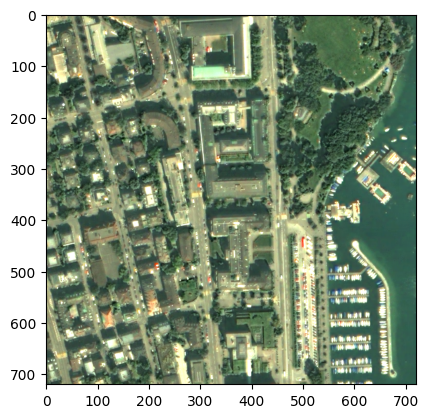

(720, 720, 9)


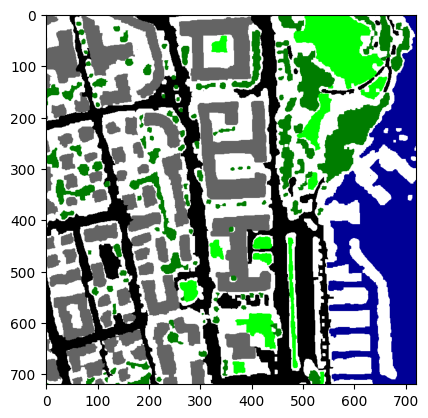

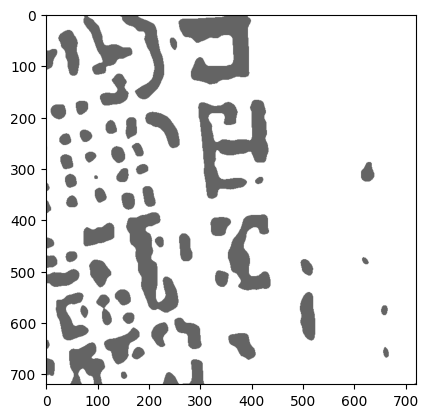

In [263]:
eval(1)

In [ ]:
predictions, results = unet.predict(val_loader, device=device)

In [ ]:
torch.save(unet.state_dict(), 'unet_model.pth')

In [ ]:
path = "path"
unet.load_state_dict(torch.load(path, map_location=device))